In [1]:
##############PART 1(a)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.models import load_model
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = (X_train/255).reshape(-1,28,28,1)
X_test = (X_test/255).reshape(-1,28,28,1)

In [12]:
img_gauss = []
for i in range(len(X_train)):
    img = X_train[i]
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('float')
    img_gauss.append(cv2.add(img,gauss))
x_train_img = np.array(img_gauss).reshape(-1,28,28,1)

In [13]:
img_gauss1 = []
for i in range(len(X_test)):
    img = X_test[i]
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('float')
    img_gauss1.append(cv2.add(img,gauss))
x_test_img = np.array(img_gauss1).reshape(-1,28,28,1)

In [35]:
input_img = Input(shape=(28,28,1)) 

##############ENCODING
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)

#FC Layer
x = Dense(400,activation='relu')(x)
x = Dropout(0.3)(x)

encoded = Dense(100,activation='relu')(x)
x = Dropout(0.1)(encoded)

x = Dense(400,activation='relu')(x)
x = Dropout(0.1)(x)

x = Dense(1568)(x)
x = Dropout(0.3)(x)
x = Reshape((7,7,32))(x)

##############DECODING
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [63]:
Autoencoder = Model(input_img, decoded)

#compiling the autoencoder
Autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])
Autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 400)               6276

In [47]:
#training the model with a batch size of 128 and 5 epochs
history = Autoencoder.fit(x_train_img, X_train, epochs = 5 , batch_size = 128, validation_data = (x_test_img, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 276s 5ms/step - loss: 0.2533 - accuracy: 0.8007 - val_loss: 0.2194 - val_accuracy: 0.7751
Epoch 2/5
60000/60000 [==============================] - 274s 5ms/step - loss: 0.2018 - accuracy: 0.7946 - val_loss: 0.1775 - val_accuracy: 0.8000
Epoch 3/5
60000/60000 [==============================] - 277s 5ms/step - loss: 0.1842 - accuracy: 0.7982 - val_loss: 0.1670 - val_accuracy: 0.8015
Epoch 4/5
60000/60000 [==============================] - 279s 5ms/step - loss: 0.1764 - accuracy: 0.7999 - val_loss: 0.1610 - val_accuracy: 0.8006
Epoch 5/5
60000/60000 [==============================] - 268s 4ms/step - loss: 0.1716 - accuracy: 0.8008 - val_loss: 0.1567 - val_accuracy: 0.8022


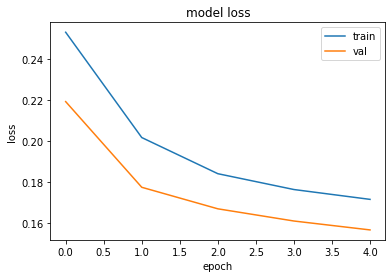

In [48]:
#plotting the training and val losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [49]:
output = Autoencoder.predict(x_test_img , verbose=1)

10000/10000 [==============================] - 8s 837us/step


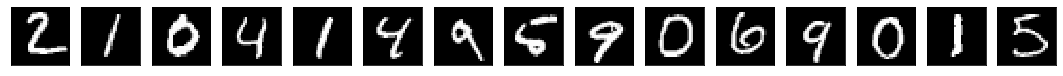

In [52]:
#First 15 images from the MNIST test set
n = 16
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test[i].reshape(28, 28),cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

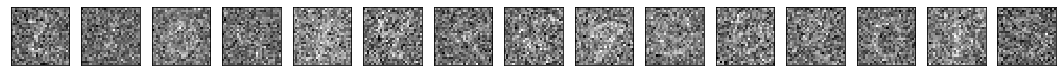

In [53]:
#images after adding gaussian noise to them
n = 16
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_img[i].reshape(28, 28),cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

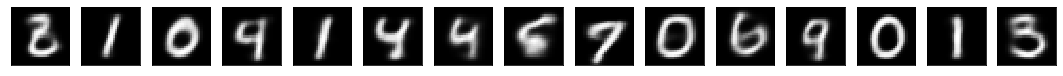

In [54]:
#corresponding denoised output images from the trained autoencoder
n = 16
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(output[i].reshape(28, 28),cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [331]:
#############PART 1(b)

In [96]:
#layers in the autoencoder
Autoencoder.layers

In [97]:
#keeping only the encoding layers exept the  from the full autoencoder model
for i in range(13):
    Autoencoder.layers.pop()

In [140]:
Autoencoder.layers

In [150]:
#to finetune only the final FC layer
for layer in Autoencoder.layers[:6]:
    layer.trainable = False

In [151]:
#Adding the final layer with sigmoid activation for digit classification
x = Dense(10,activation='sigmoid')(Autoencoder.layers[-1].output)

In [152]:
#naming the classification model Classifier
Classifier = Model(input= Autoencoder.input, output=x)
Classifier.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 400)               627

C:\Users\Puja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [154]:
#compiling the model
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [155]:
#Using early stopping and model checkpoint to save the best model while training the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [156]:
#encoding the labels as one-hot vectors
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [158]:
#fitting the classification model
history1 = Classifier.fit(x_train_img , Y_train, batch_size=128, epochs = 10, validation_data= (x_test_img, Y_test), callbacks = [es,mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 605us/step - loss: 0.3464 - accuracy: 0.9000 - val_loss: 0.3047 - val_accuracy: 0.9000

Epoch 00001: val_loss improved from inf to 0.30468, saving model to best_model.h5
Epoch 2/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.2478 - accuracy: 0.9034 - val_loss: 0.1937 - val_accuracy: 0.9173

Epoch 00002: val_loss improved from 0.30468 to 0.19373, saving model to best_model.h5
Epoch 3/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.1710 - accuracy: 0.9437 - val_loss: 0.1532 - val_accuracy: 0.9623

Epoch 00003: val_loss improved from 0.19373 to 0.15318, saving model to best_model.h5
Epoch 4/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.1390 - accuracy: 0.9668 - val_loss: 0.1300 - val_accuracy: 0.9678

Epoch 00004: val_loss improved from 0.15318 to 0.13005, saving model to best_model.h5
Epoch 5/10

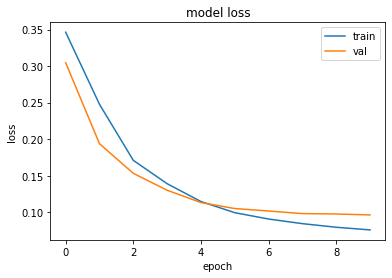

In [159]:
#plotting the training and val losses
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [161]:
train_loss , _ = saved_model.evaluate(x_train_img , Y_train)

60000/60000 [==============================] - 30s 503us/step


In [162]:
val_loss, _ = saved_model.evaluate(x_test_img, Y_test)

10000/10000 [==============================] - 5s 502us/step


In [163]:
train_loss

0.0586459375778834

In [164]:
val_loss

0.09622415667772292

In [170]:
#####classes predicted by the model
y_prob = saved_model.predict(x_test_img) 
y_classes = y_prob.argmax(axis=-1)
y_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [169]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [179]:
print(np.unique(y_classes == y_test,return_counts=True)[1][1]," classified correctly")
print(np.unique(y_classes == y_test,return_counts=True)[1][0]," classified incorrectly")

8340  classified correctly
1660  classified incorrectly
